# Prompt Engineering Deployed by Nandini Lokesh Reddy

### Load the sample image

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.5 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 43.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 48.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

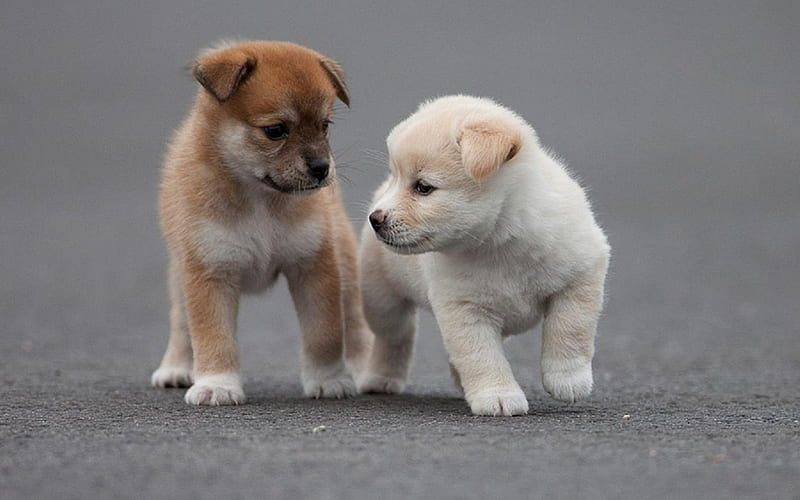

In [2]:
from PIL import Image
raw_image = Image.open("dog.jpg")
raw_image

* Resize the image.

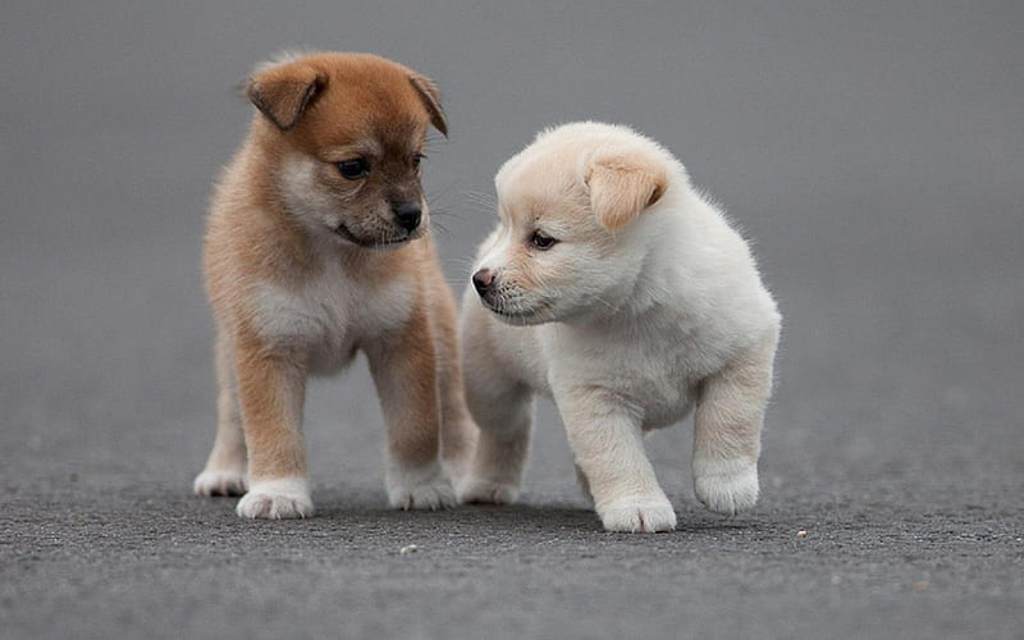

In [3]:
from utils import resize_image
resized_image = resize_image(raw_image, input_size=1024)
resized_image

### Import and prepare the model

In [4]:
import torch

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Info about [torch](https://pytorch.org/).

In [6]:
from ultralytics import YOLO
model = YOLO('FastSAM-s.pt')

Info about ['FastSAM'](https://docs.ultralytics.com/models/fast-sam/)

### Use the model

In [7]:
from utils import show_points_on_image

In [13]:
# Define the coordinates for the point in the image
# [x_axis, y_axis]
input_points = [ [350, 300 ] ]

In [9]:
input_labels = [1] # positive point

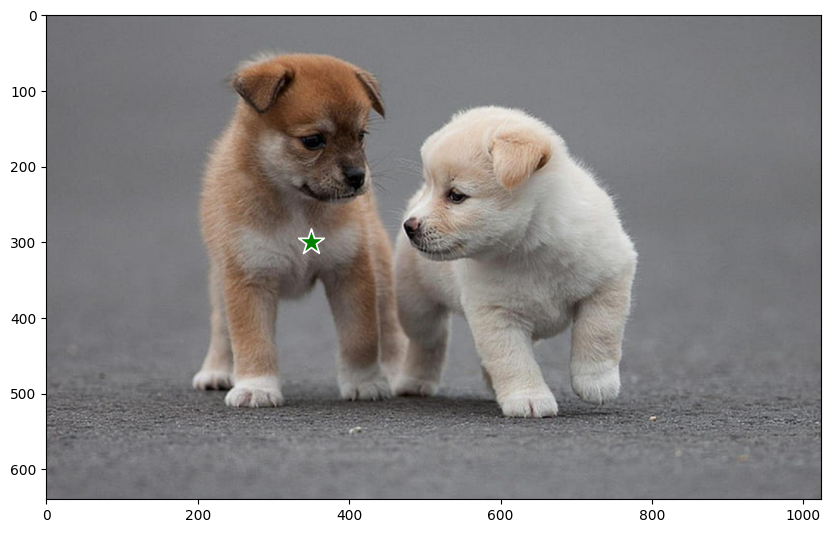

In [14]:
# Function written in the utils file
show_points_on_image(resized_image, input_points)

In [15]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 416x640 6 objects, 198.0ms
Speed: 3.3ms preprocess, 198.0ms inference, 957.6ms postprocess per image at shape (1, 3, 416, 640)


* Filter the mask based on the point defined before.

In [16]:
from utils import format_results, point_prompt

In [17]:
results = format_results(results[0], 0)

In [18]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

In [19]:
from utils import show_masks_on_image

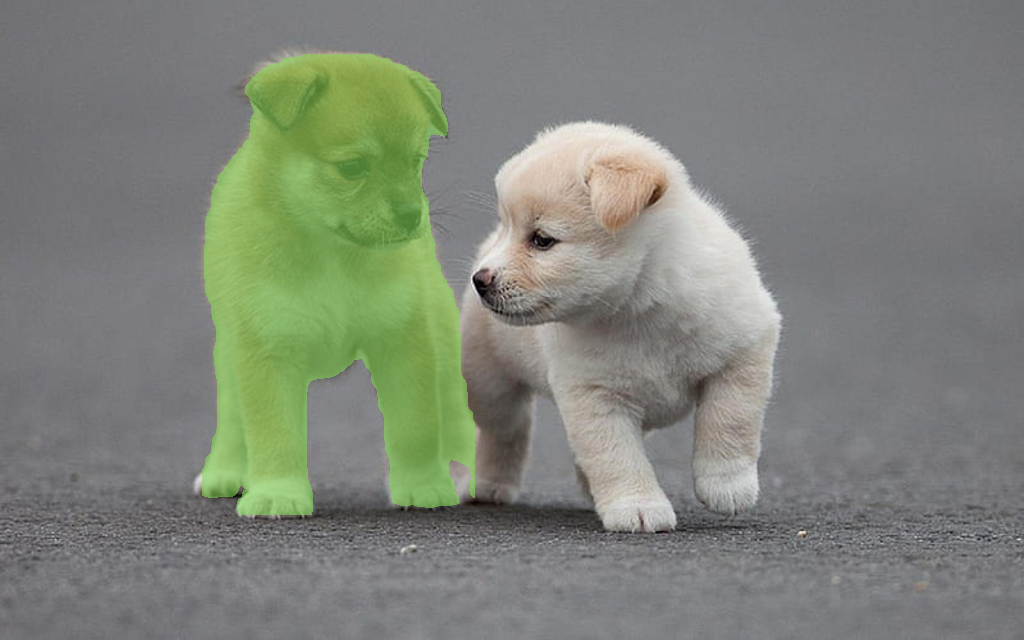

In [20]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

* Define 'semantic masks' - two points to be masked.

In [24]:
# Specify two points in the same model
# [x_axis, y_axis]
input_points = [ [350, 300], [620, 300] ]

In [22]:
# Specify both points as "positive prompt"
input_labels = [1 , 1] # both positive points

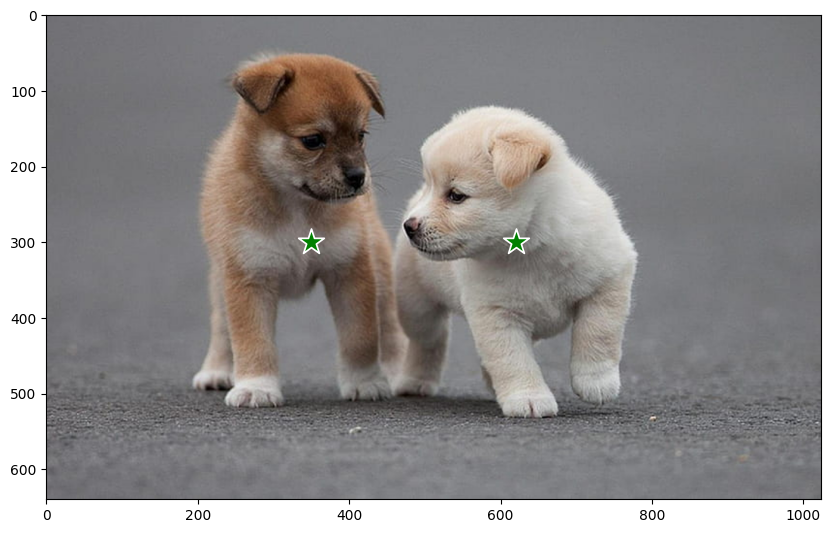

In [25]:
# Visualize the points defined before
show_points_on_image(resized_image, input_points)

In [26]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 416x640 6 objects, 228.9ms
Speed: 3.2ms preprocess, 228.9ms inference, 11.0ms postprocess per image at shape (1, 3, 416, 640)


In [27]:
results = format_results(results[0], 0)

In [28]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

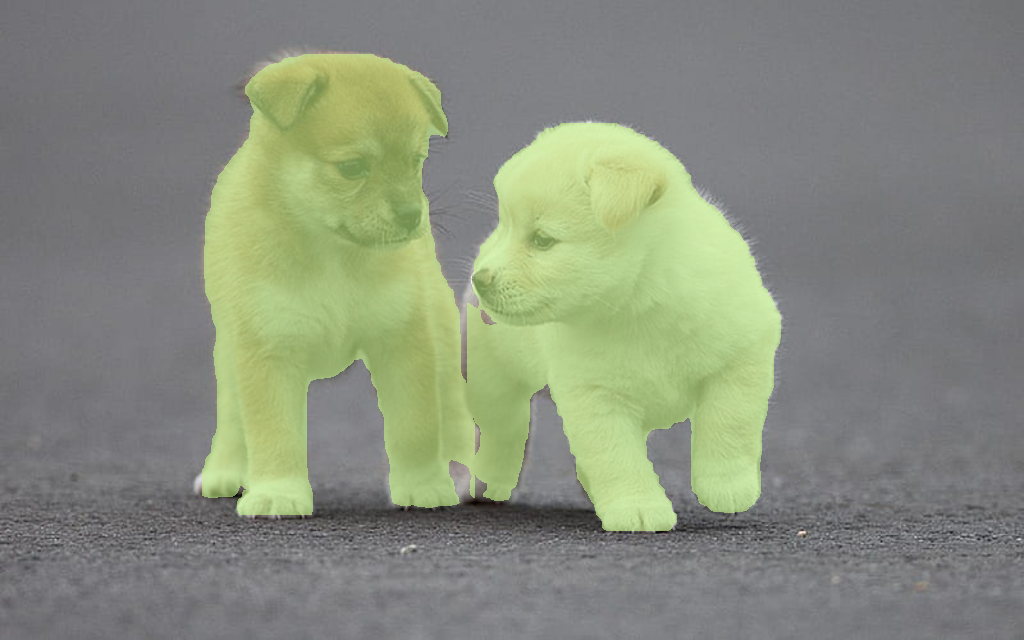

In [29]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

* Identify subsections of the image by adding a **negative prompt**.

In [30]:
# Define the coordinates for the points to be masked
# [x_axis, y_axis]
input_points = [ [350, 450], [400, 300]  ]

In [43]:
input_labels = [1, 0] # positive prompt, negative prompt

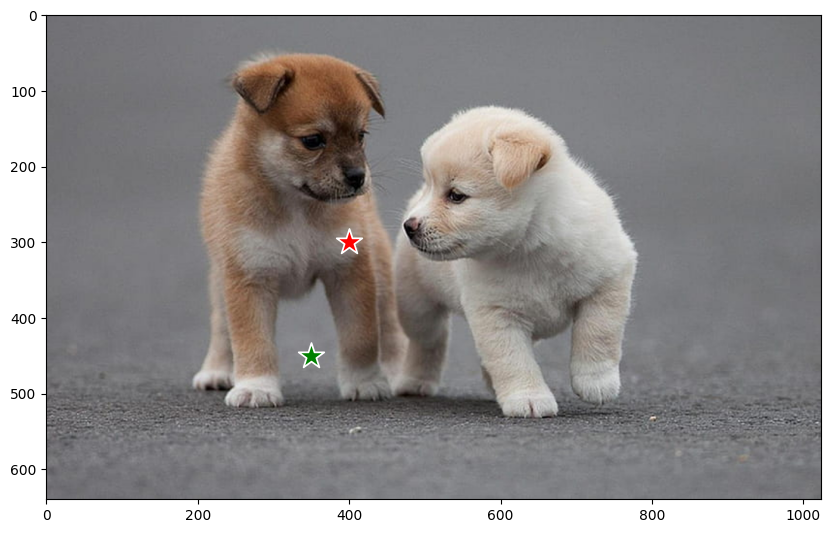

In [44]:
# Visualize the points defined before
show_points_on_image(resized_image, input_points, input_labels)

>Note: From the image above, the red star indicates the negative prompt and the green star the positive prompt.

In [45]:
# Run the model
results = model(resized_image, device=device, retina_masks=True)


0: 416x640 6 objects, 209.3ms
Speed: 4.3ms preprocess, 209.3ms inference, 10.6ms postprocess per image at shape (1, 3, 416, 640)


In [46]:
results = format_results(results[0], 0)

In [47]:
# Generate the masks
masks, _ = point_prompt(results, input_points, input_labels)

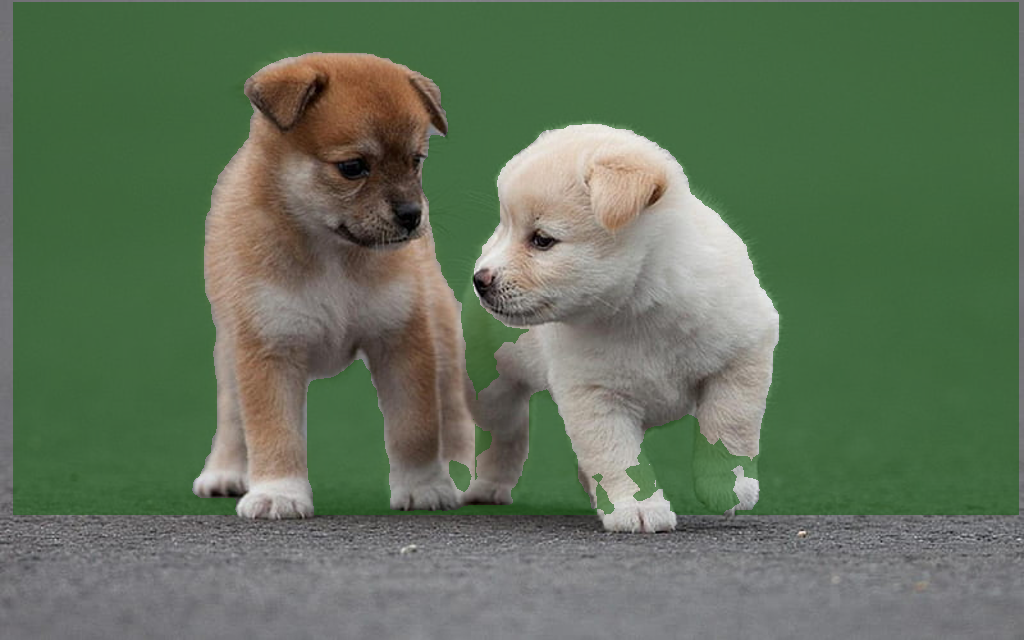

In [48]:
# Visualize the generated masks
show_masks_on_image(resized_image, [masks])

### Prompting with bounding boxes

In [49]:
from utils import box_prompt

In [56]:
# Set the coordinates for the box
# [xmin, ymin, xmax, ymax]
input_boxes = [430, 100, 780, 600]

In [57]:
from utils import show_boxes_on_image

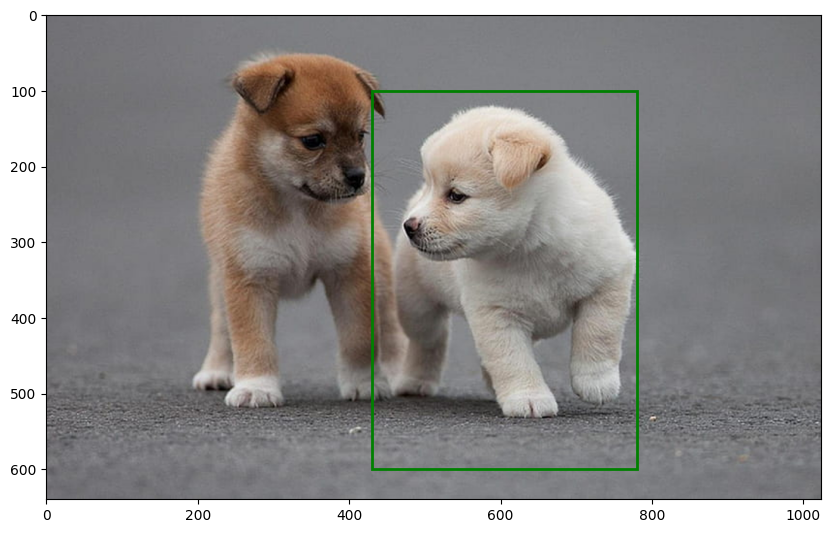

In [58]:
# Visualize the bounding box defined with the coordinates above
show_boxes_on_image(resized_image, [input_boxes])

* Now, try to isolate the mask from the total output of the model.

In [59]:
from utils import box_prompt

In [60]:
results = model(resized_image, device=device, retina_masks=True)


0: 416x640 6 objects, 175.7ms
Speed: 4.0ms preprocess, 175.7ms inference, 12.6ms postprocess per image at shape (1, 3, 416, 640)


In [61]:
#Generate the masks
masks = results[0].masks.data

In [62]:
masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [63]:
# Convert to True/False booleans
masks = masks > 0


In [64]:
masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [65]:
masks, _ = box_prompt(masks, input_boxes)

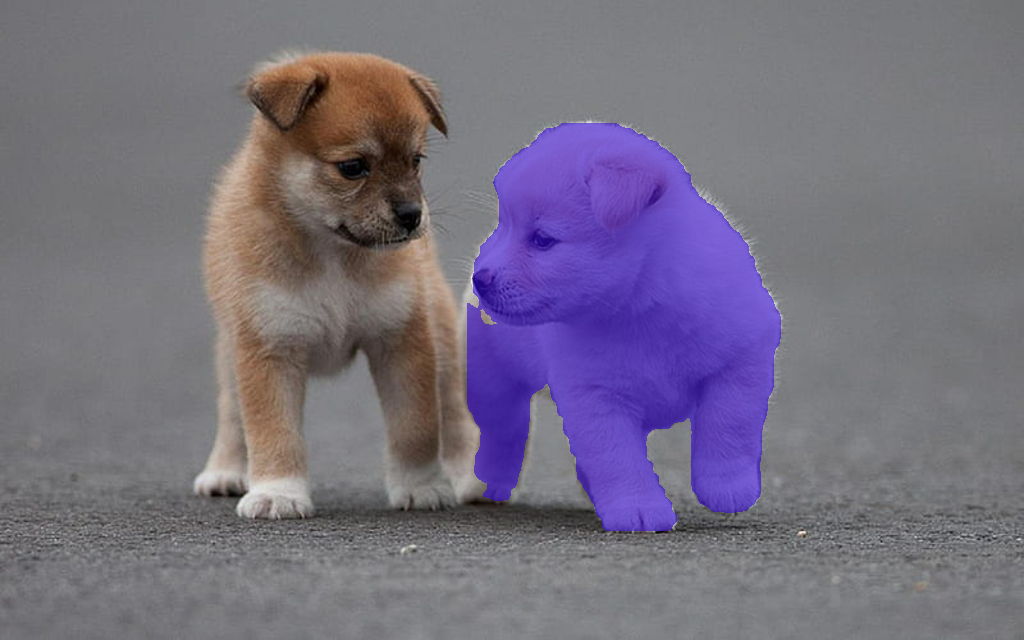

In [66]:
# Visualize the masks
show_masks_on_image(resized_image, [masks])

In [67]:
# Print the segmentation mask, but in its raw format
masks

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [68]:
# To visualize, import matplotlib
from matplotlib import pyplot as plt

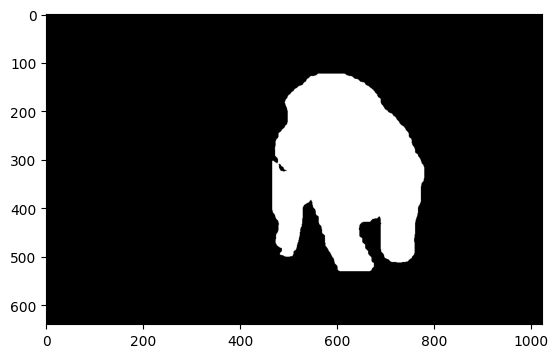

In [69]:
# Plot the binary mask as an image
plt.imshow(masks, cmap='gray')